In [2]:
#importing required
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

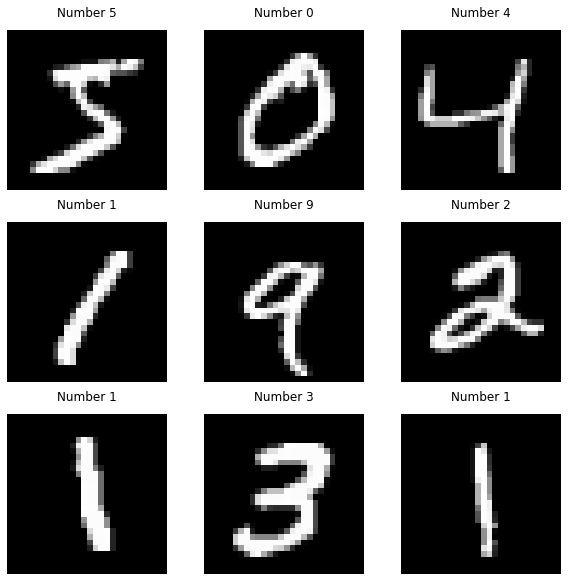

In [3]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(3,3,figsize=(10,10))
plt.gray()
for i,ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))
  fig.show()


In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2061 - accuracy: 0.9372
Epoch 2/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0812 - accuracy: 0.9752
Epoch 3/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0563 - accuracy: 0.9823
Epoch 4/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0441 - accuracy: 0.9855
Epoch 5/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0352 - accuracy: 0.9884
Epoch 6/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0294 - accuracy: 0.9902
Epoch 7/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0246 - accuracy: 0.9918
Epoch 8/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0235 - accuracy: 0.9917


In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0623 - accuracy: 0.9841


[0.06229855492711067, 0.9840999841690063]

In [9]:
p=model.predict(x_test)

In [10]:
print(p[0])

[2.23345959e-13 6.84500581e-11 1.43476645e-11 3.27785372e-08
 1.20025810e-12 3.31445348e-13 1.91249328e-21 1.00000000e+00
 2.60473115e-10 6.63814392e-10]
